# Creating a Filter, Edge Detection

### Import resources and display image

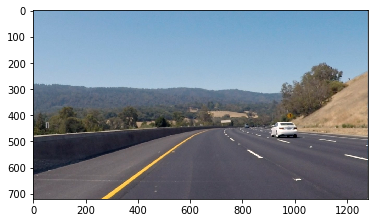

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

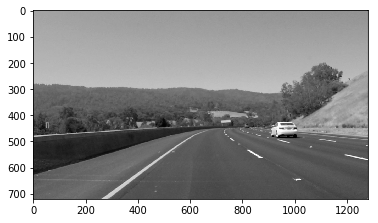

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

(720, 1280)
(720, 1280)


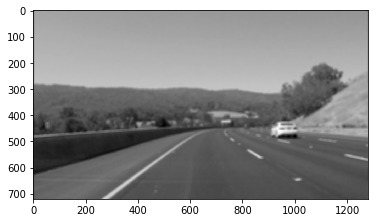

In [13]:
# blurring image

print(gray.shape)
blur = cv2.blur(gray, ksize = (10,10))
print(blur.shape)
plt.imshow(blur, cmap='gray')

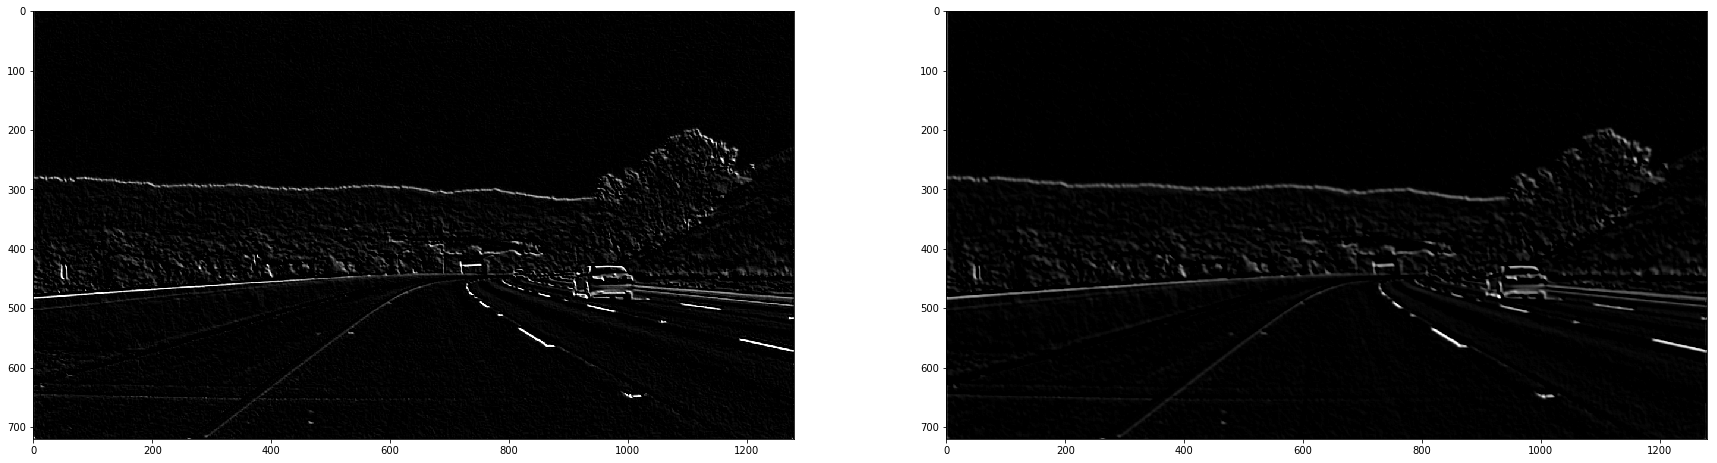

In [18]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator

sobel_x = np.array([[0, 1, 2],
                   [-1, 0, 1],
                   [-2, -1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
blur = cv2.blur(gray, ksize = (5,5))
filtered_image = cv2.filter2D(gray, -1, sobel_x)
filtered_image_blurred = cv2.filter2D(blur, -1, sobel_x)


fig = plt.figure(figsize=(30, 30))

for i, img in enumerate([filtered_image, filtered_image_blurred]):
    fig.add_subplot(1, 2, i+1)
    plt.imshow(img, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



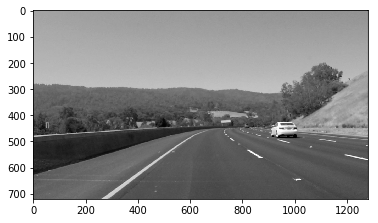

In [19]:
filter_dec = np.array([[0, 0.1, 0.2],
                   [-0.1, 0, 0.1],
                   [-0.2, -0.1, 0]])
cv2.filter2D(gray, -1, filter_dec)
plt.imshow(gray, cmap='gray')

In [27]:
imgs

['data\\bridge_trees_example.jpg',
 'data\\curved_lane.jpg',
 'data\\sobel_ops.png',
 'data\\udacity_sdc.png',
 'data\\white_lines.jpg']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


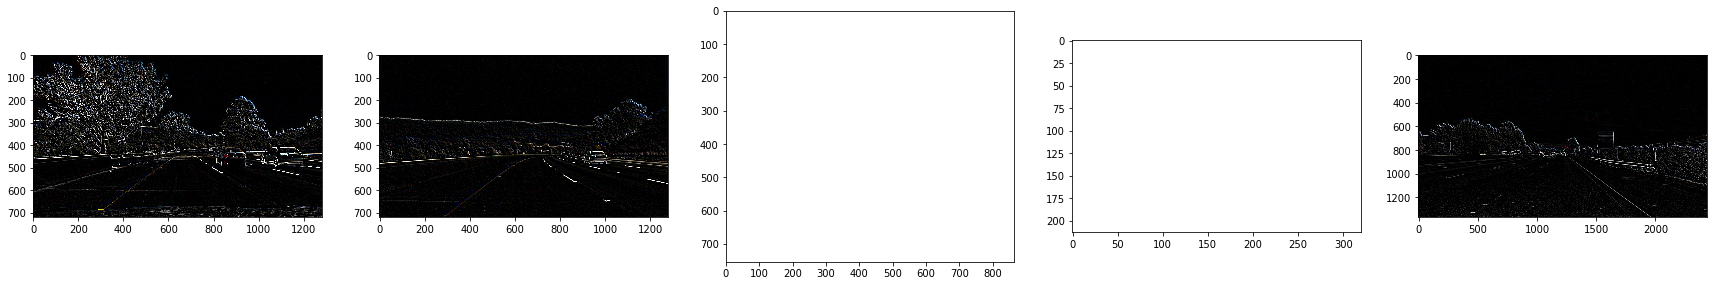

In [28]:
import os

imgs = []
for img_path in os.listdir('data'):
    imgs.append(mpimg.imread(os.path.join('data', img_path)))
    
fig = plt.figure(figsize=(30, 30))

filtered_imgs = []
for img in imgs:
    filtered_imgs.append(cv2.filter2D(img, -1, sobel_x))

for i, img in enumerate(filtered_imgs):
    fig.add_subplot(2, len(imgs), i+1)
    plt.imshow(img, cmap='gray')